In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.externals import joblib

In [2]:
area_byR = joblib.load('/home/seb/Schreibtisch/Masterarbeit/Data/effArea_mgs.pickle')
data = joblib.load('/home/seb/Schreibtisch/Masterarbeit/Data/df_corsica.pickle')

/home/seb/.local/lib/python2.7/site-packages/pandas/core/indexes/base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


In [3]:
data.head()

,index,energy_stop,quality,single_stopping,stop_z,weight,zenith,zenith_cos
0,0,918.267617,-0.050715,False,-256.223002,0.000002,0.606721,0.821522
1,1,0.000000,-0.937401,False,68.688248,0.000001,1.356955,0.212216
2,2,1065.268388,-2.217941,False,-178.998937,0.000002,0.951429,0.580520
3,3,1879.356881,0.217822,True,-322.022155,0.000002,0.859001,0.653194
4,4,0.000000,-0.059739,False,0.000000,0.000002,0.884316,0.633819


In [4]:
area_byR

,predicted_count,total_count,true_count,effective_area,effective_area_total
,MuonWeight,MuonWeight,MuonWeight,,
zen_bin,,,,,
"(0.0, 0.0333]",0.000000,1.000000,1.000000,0.000000,0.000000
"(0.0333, 0.0667]",0.000000,0.000045,0.000002,0.000000,0.000000
"(0.0667, 0.1]",0.000010,0.033930,0.000649,183077.613734,3501.062242
"(0.1, 0.133]",0.000142,0.530733,0.018343,93710.322927,3238.693550
"(0.133, 0.167]",0.000682,2.646971,0.132875,61897.753184,3107.191324
"(0.167, 0.2]",0.001169,7.809299,0.479070,29432.440548,1805.566405
"(0.2, 0.233]",0.001619,17.508969,1.235138,15816.603593,1115.753190
"(0.233, 0.267]",0.002068,32.561872,2.580540,9668.986523,766.270692


In [5]:
cut = 87.0 / 180 * np.pi
zenbins = 30
data = data[(data.single_stopping) & (data.zenith < cut)]
zen_bins = np.linspace(0, 1, num=zenbins+1)
data['zen_bin'] = pd.cut(data.zenith_cos, zen_bins)
data['effective_area'] = area_byR.effective_area.loc[data.zen_bin].values

In [6]:
data.head()

,index,energy_stop,quality,single_stopping,stop_z,weight,zenith,zenith_cos,zen_bin,effective_area
3,3,1879.356881,0.217822,True,-322.022155,0.000002,0.859001,0.653194,"(0.633, 0.667]",204.558203
5,5,704.308199,0.216070,True,74.167894,0.000002,0.359386,0.936113,"(0.933, 0.967]",324.291845
11,11,1919.483531,0.268660,True,-65.895922,0.000002,0.752902,0.729708,"(0.7, 0.733]",223.709609
29,29,786.084523,-0.118652,True,347.846820,0.000002,0.644759,0.799244,"(0.767, 0.8]",277.013352
31,31,901.579416,-0.882618,True,18.564936,0.000003,0.340372,0.942630,"(0.933, 0.967]",324.291845


In [7]:
eMin = 400
eMax = 100000
ebins = 20
e_bins = np.logspace(np.log10(eMin), np.log10(eMax), num=ebins+1)
data['e_bin'] = pd.cut(data.energy_stop, e_bins)
data.dropna(inplace=True)
data_agg = data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
data_agg.columns = ['total']
# data_agg['sec_1'] = data[data.zenith * 180 / np.pi < 50][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
# data_agg['sec_2'] = data[(data.zenith * 180 / np.pi >= 50) & (data.zenith * 180 / np.pi < 70)][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
# data_agg['sec_3'] = data[data.zenith * 180 / np.pi >= 70][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
data_agg['sec_1'] = data[data.zenith * 180 / np.pi < 50][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg['sec_2'] = data[(data.zenith * 180 / np.pi >= 50) & (data.zenith * 180 / np.pi < 70)][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg['sec_3'] = data[data.zenith * 180 / np.pi >= 70][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg.fillna(0.0, inplace=True)

In [8]:
data_agg

,total,sec_1,sec_2,sec_3
e_bin,,,,
"(400.0, 527.178]",287.916509,263.703907,10.557622,13.654980
"(527.178, 694.791]",271.005999,250.626972,7.673079,12.705948
"(694.791, 915.695]",247.000841,225.929571,10.365340,10.705930
"(915.695, 1206.835]",233.240244,192.609997,38.068313,2.561934
"(1206.835, 1590.541]",289.136323,152.865744,103.470575,32.800004
"(1590.541, 2096.245]",378.274767,106.161115,219.039877,53.073775
"(2096.245, 2762.734]",803.096989,66.716900,333.892714,402.487375
"(2762.734, 3641.128]",1812.166447,40.074459,381.080475,1391.011513
"(3641.128, 4798.804]",3836.786930,22.415107,328.666053,3485.705770


In [9]:
data_agg['lim'] = data_agg.index.categories.left
data_agg = data_agg.append(data_agg[-1:])
data_agg.lim[-1:] = data_agg.index.categories[-1:].right

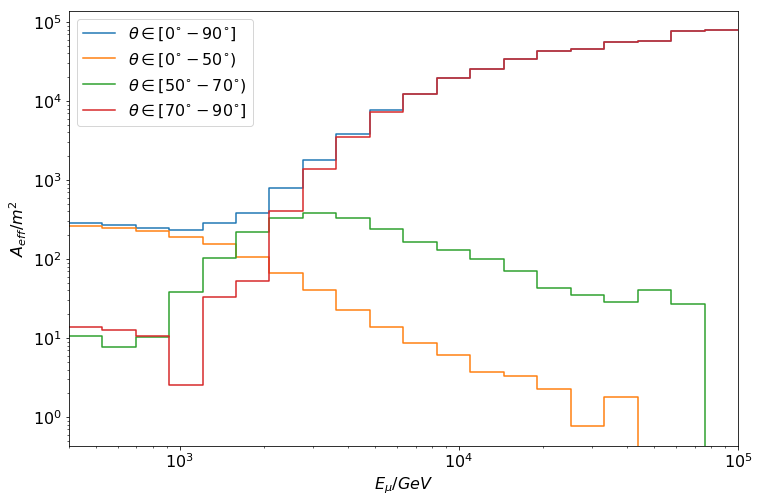

In [10]:
ax = data_agg.plot(loglog=True, drawstyle="steps-post", x='lim', y=['total', 'sec_1', 'sec_2', 'sec_3'],
              label=[r'$\theta \in [0 ^{\circ} - 90 ^{\circ}$]', r'$\theta \in [0 ^{\circ} - 50 ^{\circ})$', 
                     r'$\theta \in [50 ^{\circ} - 70 ^{\circ})$', r'$\theta \in [70 ^{\circ} - 90 ^{\circ}]$'], 
                   figsize=(12, 8))

ax.legend(loc='best', prop={'size': 16})
ax.set_xlabel(r'$E_{\mu} / GeV$', fontsize=16)
ax.set_ylabel(r'$A_{eff} / m^2$', fontsize=16)
ax.tick_params(labelsize=16)

In [11]:
data.effective_area = area_byR.effective_area_total.loc[data.zen_bin].values

In [12]:
data.head()

,index,energy_stop,quality,single_stopping,stop_z,weight,zenith,zenith_cos,zen_bin,effective_area,e_bin
3,3,1879.356881,0.217822,True,-322.022155,0.000002,0.859001,0.653194,"(0.633, 0.667]",29.216417,"(1590.541, 2096.245]"
5,5,704.308199,0.216070,True,74.167894,0.000002,0.359386,0.936113,"(0.933, 0.967]",62.168283,"(694.791, 915.695]"
11,11,1919.483531,0.268660,True,-65.895922,0.000002,0.752902,0.729708,"(0.7, 0.733]",34.020699,"(1590.541, 2096.245]"
29,29,786.084523,-0.118652,True,347.846820,0.000002,0.644759,0.799244,"(0.767, 0.8]",44.768355,"(694.791, 915.695]"
31,31,901.579416,-0.882618,True,18.564936,0.000003,0.340372,0.942630,"(0.933, 0.967]",62.168283,"(694.791, 915.695]"


In [13]:
data_agg = data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
data_agg.columns = ['total']
data_agg['sec_1'] = data[data.zenith * 180 / np.pi < 50][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg['sec_2'] = data[(data.zenith * 180 / np.pi >= 50) & (data.zenith * 180 / np.pi < 70)][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg['sec_3'] = data[data.zenith * 180 / np.pi >= 70][['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(x * data.loc[x.index, "weight"])) / data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.sum(data.loc[x.index, "weight"]))
data_agg.fillna(0.0, inplace=True)

In [14]:
data_agg

,total,sec_1,sec_2,sec_3
e_bin,,,,
"(400.0, 527.178]",52.981115,50.587772,1.257797,1.135546
"(527.178, 694.791]",48.524229,46.613350,0.901949,1.008930
"(694.791, 915.695]",42.342118,40.186771,1.318243,0.837103
"(915.695, 1206.835]",38.528173,33.321048,4.990841,0.216284
"(1206.835, 1590.541]",40.757109,26.144438,12.988053,1.624618
"(1590.541, 2096.245]",48.402208,17.903089,25.736241,4.762878
"(2096.245, 2762.734]",83.997649,11.187909,37.495709,35.314031
"(2762.734, 3641.128]",164.436933,6.655780,41.440304,116.340850
"(3641.128, 4798.804]",310.025065,3.717959,35.307702,270.999404


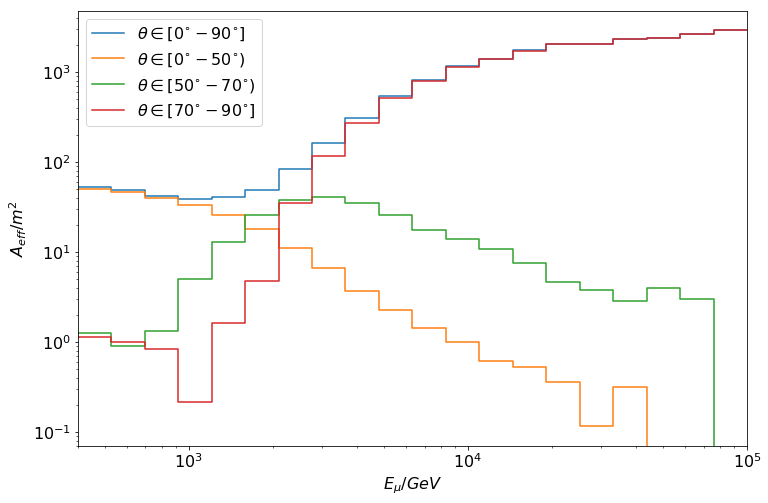

In [15]:
data_agg['lim'] = data_agg.index.categories.left
data_agg = data_agg.append(data_agg[-1:])
data_agg.lim[-1:] = data_agg.index.categories[-1:].right
ax = data_agg.plot(loglog=True, drawstyle="steps-post", x='lim', y=['total', 'sec_1', 'sec_2', 'sec_3'],
              label=[r'$\theta \in [0 ^{\circ} - 90 ^{\circ}$]', r'$\theta \in [0 ^{\circ} - 50 ^{\circ})$', 
                     r'$\theta \in [50 ^{\circ} - 70 ^{\circ})$', r'$\theta \in [70 ^{\circ} - 90 ^{\circ}]$'], 
                   figsize=(12, 8))

ax.legend(loc='best', prop={'size': 16})
ax.set_xlabel(r'$E_{\mu} / GeV$', fontsize=16)
ax.set_ylabel(r'$A_{eff} / m^2$', fontsize=16)
ax.tick_params(labelsize=16)

In [16]:
eMin = 400
eMax = 10000
ebins = 20
e_bins = np.logspace(np.log10(eMin), np.log10(eMax), num=ebins+1)
data['e_bin'] = pd.cut(data.energy_stop, e_bins)
data.dropna(inplace=True)
data_agg = data[['effective_area', 'e_bin']].groupby('e_bin').agg(lambda x: np.average(x,weights=data.loc[x.index, "weight"]))
data_agg.columns = ['total']
data_agg.fillna(0.0, inplace=True)
joblib.dump(data_agg, "/home/seb/Schreibtisch/Masterarbeit/Data/effArea_mgs_corsica_total.pickle")

['/home/seb/Schreibtisch/Masterarbeit/Data/effArea_mgs_corsica_total.pickle']